In [1]:
using JuMP
using GLPK
using Xpress
using Plots

┌ Info: Xpress: Found license file C:\xpressmp\bin\xpauth.xpr
└ @ Xpress C:\Users\tjfur\.julia\packages\Xpress\eJoYN\src\license.jl:44
┌ Info: Xpress: Development license detected.
└ @ Xpress C:\Users\tjfur\.julia\packages\Xpress\eJoYN\src\license.jl:89


Q1. part 1

In [ ]:
model = Model(Xpress.Optimizer)
# Decision Variables
# Create one variable for each Decision Variables
@variable(model,  x >= 0 )
@variable(model, y >= 0 )
# Constarints
@constraint(model, 5x + 10y <= 20)
@constraint(model, 4x + 2y <= 12)
@constraint(model, 3x + 10y <= 18)
@constraint(model, 4x + 6y <= 14)
# Objective function:
#  Max z = x+2y
@objective(model, Max, x + 2y)
optimize!(model)

println("x value: ",value(x))
println("y value: ",value(y))
println("objective value: ",objective_value(model))

FICO Xpress v8.12.3, Community, solve started 15:59:19, Nov 4, 2021
Heap usage: 81KB (peak 81KB, 829KB system)
Maximizing LP  with these control settings:
OUTPUTLOG = 1
MPSNAMELENGTH = 64
CALLBACKFROMMASTERTHREAD = 1
Original problem has:
         4 rows            2 cols            8 elements
Presolved problem has:
         4 rows            2 cols            8 elements
Presolve finished in 0 seconds
Heap usage: 82KB (peak 98KB, 831KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.00e+00,  1.00e+01] / [ 3.75e-01,  1.50e+00]
  RHS and bounds [min,max] : [ 1.20e+01,  2.00e+01] / [ 2.25e+00,  3.50e+00]
  Objective      [min,max] : [ 1.00e+00,  2.00e+00] / [ 1.00e+00,  2.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0          6.600033      D      4     0        .000000     0
     3          4.000000      D      0     0        .000000     0
Uncru

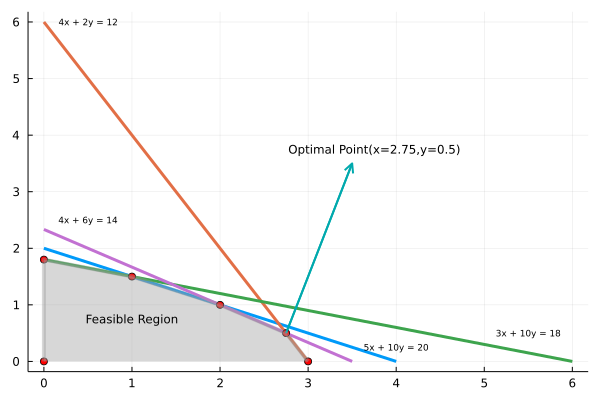

In [11]:
# Graphical Method
x1 = [0,4]; y1 = [2,0]
x2 = [0,3]; y2 = [6,0]
x3 = [0,6]; y3 = [1.8,0]
x4 = [0,3.5]; y4 = [2.333,0]

# Plotting constraint lines
p1 = plot(x1, y1,lw=3, annotation=[(0.5,6,"4x + 2y = 12",6)])
p2=plot!(p1, x2, y2,lw=3,annotation=[(4,0.25,"5x + 10y = 20",6)])
p3=plot!(p2, x3, y3,lw=3,annotation=[(5.5,0.5,"3x + 10y = 18",6)])
p4=plot!(p3, x4, y4,lw=3,annotation=[(0.5,2.5, "4x + 6y = 14",6)])

# Plotting points on the feasible region
p5=plot!(p4, [0,0,1,2, 2.75, 3], [0,1.8,1.5,1,0.5, 0], seriestype = :scatter,legend = false,color="red")
p6=plot!(p5,[2.75,3.5],[0.5,3.5],lw=2,arrow=0.4,annotation=[(3.75,3.75,"Optimal Point(x=2.75,y=0.5)",8)])

# Plotting feasible region
x=[0,0,1,2, 2.75, 3]; y=[0,1.8,1.5,1,0.5, 0]
plot!(p4,x,y,palette = cgrad(:grays),lw=4, fill = 0, α = 0.4,annotation=[(1,0.75,"Feasible Region",8)])

Q1. part 2

In [ ]:
# Graphical Method
x1 = [0,1]; y1 = [2,0]
x2 = [0,2]; y2 = [1,0]
x3 = [0,1]; y3 = [1,0]

# Plotting constraint lines
p1 = plot(x1, y1,lw=3, annotation=[(0.5,6,"x1 + 2x2 = 2",6)])
p2=plot!(p1, x2, y2,lw=3,annotation=[(4,0.25,"2x1 + x2 = 2",6)])
p3=plot!(p2, x3, y3,lw=3,annotation=[(5.5,0.5,"x1 + x2 = 1",6)])

# Plotting points on the feasible region
p4=plot!(p3, [0,0,0.677,1], [0,1,0.677,0], seriestype = :scatter,legend = false,color="red")
p5=plot!(p4,[],[],lw=2,arrow=0.4,annotation=[(3.75,3.75,"Optimal Point(x=2.75,y=0.5)",8)])

# Plotting feasible region
# x=[0,0,0.677,1]; y= [0,1,0.677,0]
plot!(annotation=[(1,1.25,"There is no Feasible Region or Optimal Solution",8)])

Question 2. 

In [13]:
model = Model(Xpress.Optimizer)
# Decision Variables
# x1: percentage of network resources
# x2: percentage of I/O resources
# x3: percentage of compute resources
@variable(model, x1 >= 0 )
@variable(model, x2 >=0 )
@variable(model, x3 >=0 )
# Constraints
#task1 constraint
@constraint(model, x1 + 0.1x2 + 0.1x3 <= 1)
#task2 constraint
@constraint(model, 0.1x1 + x2 + 0.1x3 <= 1) 
#task3 constraint
@constraint(model, 0.1x1 + 0.1x2 + x3 <= 1)

# Objective Function:
@objective(model, Max, x1 + x2 + x3)

optimize!(model)

println("x1 value: ",value(x1))
println("x2 value: ",value(x2))
println("x3 value: ",value(x3))
println("objective value: ",objective_value(model))

FICO Xpress v8.12.3, Community, solve started 15:59:33, Nov 4, 2021
Heap usage: 81KB (peak 81KB, 923KB system)
Maximizing LP  with these control settings:
OUTPUTLOG = 1
MPSNAMELENGTH = 64
CALLBACKFROMMASTERTHREAD = 1
Original problem has:
         3 rows            3 cols            9 elements
Presolved problem has:
         3 rows            3 cols            9 elements
Presolve finished in 0 seconds
Heap usage: 82KB (peak 98KB, 925KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e-01,  1.00e+00] / [ 1.00e-01,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0          3.000033      D      3     0        .000000     0
     3          2.500000      D      0     0        .000000     0
Uncru

In [14]:
model = Model(Xpress.Optimizer)
# Decision Variables
# x1: percentage of network resources
# x2: percentage of I/O resources
# x3: percentage of compute resources
@variable(model, x1 >= 0 )
@variable(model, x2 >=0 )
@variable(model, x3 >=0 )
# Constraints
#task1 constraint
@constraint(model, ctr1, x1 + 0.1x2 + 0.1x3 <= 1)
#task2 constraint
@constraint(model, ctr2, 0.1x1 + x2 + 0.1x3 <= 1) 
#task3 constraint
@constraint(model, ctr3, 0.1x1 + 0.1x2 + x3 <= 1)

# Objective Function:
@objective(model, Max, x1 + x2 + x3)

optimize!(model)

println("x1 value: ",value(x1))
println("x2 value: ",value(x2))
println("x3 value: ",value(x3))
println("objective value: ",objective_value(model))

report = lp_sensitivity_report(model)

x1_lo, x1_hi = report[x1]
println("The objective coefficient of x1 can decrease to $(x1_lo) or increase to $(x1_hi), without altering the values of x1, x2 and x3")

x2_lo, x2_hi = report[x2]
println("The objective coefficient of x2 can decrease to $(x2_lo) or increase to $(x2_hi), without altering the values of x1, x2 and x3")

x3_lo, x3_hi = report[x3]
println("The objective coefficient of x2 can decrease to $(x3_lo) or increase to $(x3_hi), without altering the values of x1, x2 and x3")

ctr1_lo, ctr1_hi = report[ctr1]
println("The RHS coefficient of constraint 1 can decrease to $(ctr1_lo) or increase to $(ctr1_hi), without altering the solution variable mix")

ctr2_lo, ctr2_hi = report[ctr2]
println("The RHS coefficient of constraint 2 can decrease to $(ctr2_lo) or increase to $(ctr2_hi), without altering the solution variable mix")

ctr3_lo, ctr3_hi = report[ctr3]
println("The RHS coefficient of constraint 2 can decrease to $(ctr3_lo) or increase to $(ctr3_hi), without altering the solution variable mix")


FICO Xpress v8.12.3, Community, solve started 15:59:33, Nov 4, 2021
Heap usage: 81KB (peak 81KB, 1102KB system)
Maximizing LP  with these control settings:
OUTPUTLOG = 1
MPSNAMELENGTH = 64
CALLBACKFROMMASTERTHREAD = 1
Original problem has:
         3 rows            3 cols            9 elements
Presolved problem has:
         3 rows            3 cols            9 elements
Presolve finished in 0 seconds
Heap usage: 82KB (peak 98KB, 1105KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e-01,  1.00e+00] / [ 1.00e-01,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0          3.000033      D      3     0        .000000     0
     3          2.500000      D      0     0        .000000     0
Unc

Question 3 part 1 

In [21]:
model = Model(Xpress.Optimizer)
# Decision Variables
# Create one variable for each Decision Variables
# x is height, y is width, m is the margin 
# y>= ax + b + m
# y<= ax + b + m
@variable(model, a )
@variable(model, b )
@variable(model, m >= 0 )
# Constarints
#apples
@constraint(model, 60a + b + m <= 62)
@constraint(model, 55a + b + m <= 50)
@constraint(model, 65a + b + m <= 68)
@constraint(model, 55a + b + m <= 56)
@constraint(model, 68a + b + m <= 65)
@constraint(model, 60a + b + m <= 58)
#pears
@constraint(model, 70a + b - m >= 53)
@constraint(model, 76a + b - m >= 40)
@constraint(model, 68a + b - m >= 45)
@constraint(model, 63a + b - m >= 45)


# Objective function:
#  Max m 
@objective(model, Max, m )
optimize!(model)

println("a value: ",value(a))
println("b value: ",value(b))
println("m value: ",value(m))
println("objective value: ",objective_value(model))


FICO Xpress v8.12.3, Community, solve started 12:27:31, Nov 5, 2021
Heap usage: 83KB (peak 83KB, 1750KB system)
Maximizing LP  with these control settings:
OUTPUTLOG = 1
MPSNAMELENGTH = 64
CALLBACKFROMMASTERTHREAD = 1
Original problem has:
        10 rows            3 cols           30 elements
Presolved problem has:
         8 rows            3 cols           24 elements
Presolve finished in 0 seconds
Heap usage: 84KB (peak 101KB, 1752KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  7.60e+01] / [ 5.00e-01,  1.97e+00]
  RHS and bounds [min,max] : [ 4.00e+01,  6.80e+01] / [ 6.25e-01,  1.81e+00]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 3.20e+01,  3.20e+01]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0           .000000      D      1     1      32.000000     0
     4          7.115385      D      0     0        .000000     0
Un

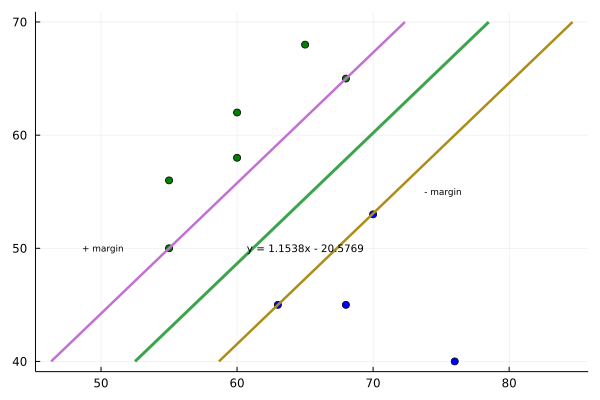

In [32]:
p1=plot([60, 55, 65, 55, 68, 60], [62, 50, 68, 56, 65, 58], seriestype = :scatter,legend = false,color="green")
p2=plot!(p1, [70,76,68,63], [53,40,45,45], seriestype = :scatter,legend = false,color="blue")

# the line y = ax + b 
# where a = 1.153846153846154 and b = -20.57692307692308 
# seems to be the line that maximises the margin between the 
# two sets of points. 


x1 = [52.5,78.5]; y1 = [40,70]
# x, y values when the margin is applied 
x2 = [46.33,72.34]; y2 = [40,70]
x3 = [58.667,84.66]; y3 = [40,70]
p3 = plot!(p2, x1, y1,lw=3, annotation=[(65, 50,"y = 1.1538x - 20.5769",7)])
p4 = plot!(p3, x2, y2,lw=2.5, annotation=[(50, 50, " + margin", 6)])
p5 = plot!(p4, x3, y3,lw=2.5, annotation=[(75, 55, " - margin", 6)])

Question 4

To convert this non-linear objective function into a linear one we need to modify the absolute function.
FOr the absolute value we rewrite |diff_i| so we always obtain a non negative value#; 

$$if power>=a * speed _i -b:$$
$$|power_i - a speed_i - b| = power_i -a*speed_i - b$$
lets  call  this x_i


$$if power<>=a * speed _i -b:$$
$$|power_i - a speed_i - b| = a*speed_i + b - power_i$$
$$lets call this y_i$$

$$we can rewrite our function as power_i - a * speed - b = x_i - y_i$$

now we have an objective function which is to 
$$Maximise\ \sum_{i=1}^{10}x_i + \sum_{i=1}^{10}y_i$$
$$s.t.\  (power_i ( a * speed_i + b)) == x_i - y_i$$
$$for\ i = 1, 2, 3, 4,..., 10$$

In [2]:
using JuMP
import GLPK
import Test

speed = [2.0, 3.0, 1.0, 2.0, 6.0, 7.0, 6.0, 8.0, 10.0, 9.0]
power = [0.3, 0.3, 0.3, 0.4, 0.5, 0.5, 0.7, 0.6, 0.7, 0.5]

model = Model(Xpress.Optimizer)
#decision variables
@variable(model, a)
@variable(model, b)
@variable(model, x[1:10] >= 0)
@variable(model, y[1:10] >= 0)
#constraint
for i in 1:10
    @constraint(model,(power[i] - (a*speed[i] + b)) == x[i] - y[i])
end

@objective(model,Min,(sum(x[i] for i=1:10))+(sum(y[i] for i=1:10)))
optimize!(model)

println("a value: ",value(a))
println("b value: ",value(b))



FICO Xpress v8.12.3, Community, solve started 22:59:17, Nov 7, 2021
Heap usage: 84KB (peak 85KB, 463KB system)
Minimizing LP  with these control settings:
OUTPUTLOG = 1
MPSNAMELENGTH = 64
CALLBACKFROMMASTERTHREAD = 1
Original problem has:
        10 rows           22 cols           40 elements
Presolved problem has:
        10 rows           22 cols           40 elements
Presolve finished in 0 seconds
Heap usage: 87KB (peak 108KB, 465KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+01] / [ 1.25e-01,  1.75e+00]
  RHS and bounds [min,max] : [ 3.00e-01,  7.00e-01] / [ 6.25e-02,  3.00e-01]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  8.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0           .000000      D     10     0        .000000     1
    10           .600000      D      0     0        .000000     1
Uncr